In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
file_path = 'Threats (1).csv'
data = pd.read_csv(file_path)
data = data.drop("Unnamed: 0", axis='columns')

X = data.drop(["label", "attack_cat"], axis='columns')
y = data["attack_cat"]

X = pd.get_dummies(X, drop_first=True)
y_encoded = y.astype("category").cat.codes


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf_balanced = DecisionTreeClassifier(max_depth=10, criterion="gini", class_weight='balanced', random_state=42)
clf_balanced.fit(X_train, y_train)

y_pred_balanced = clf_balanced.predict(X_test)
class_names = list(y.astype("category").cat.categories)

report = classification_report(
    y_test,
    y_pred_balanced,
    target_names=class_names
)

print(report)
matrix_balanced = confusion_matrix(y_test, y_pred_balanced)



                precision    recall  f1-score   support

      Analysis       0.12      0.39      0.18       397
      Backdoor       0.07      0.89      0.13       360
           DoS       0.41      0.09      0.14      2484
      Exploits       0.88      0.47      0.61      6655
       Fuzzers       0.74      0.83      0.78      3596
       Generic       1.00      0.98      0.99      7966
        Normal       0.95      0.75      0.84      3246
Reconnaissance       0.82      0.79      0.80      2100
     Shellcode       0.41      0.93      0.57       236
         Worms       0.22      0.83      0.35        29

      accuracy                           0.70     27069
     macro avg       0.56      0.69      0.54     27069
  weighted avg       0.83      0.70      0.73     27069



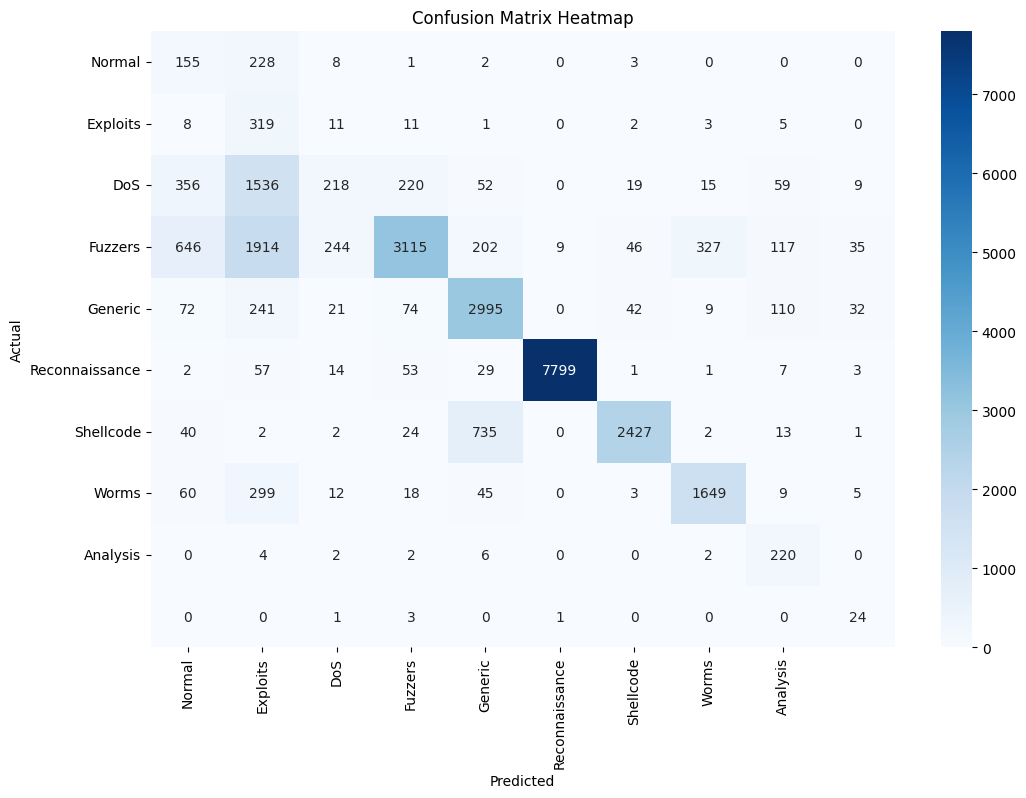

In [4]:
# Plot Heatmap for Confusion Matrix
attack_mapping = {
    'Normal': 0,
    'Exploits': 1,
    'DoS': 2,
    'Fuzzers': 3,
    'Generic': 4,
    'Reconnaissance': 5,
    'Shellcode': 6,
    'Worms': 7,
    'Analysis': 8
}
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=attack_mapping.keys(), yticklabels=attack_mapping.keys())
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()